# Analysis of citizenship in the Gale corpus

0. create list of target terms
1. identify which texts contain target terms (for representation over time)
2. extract kwics
3. extract collocates
4. create vectors

In [192]:
terms = ['_fn','citizen', 'citizenship', 'resident', 'alien', 'community']

Which texts contain target terms? Read in csv with use_columns option for target terms

In [193]:
dtm = '/Users/e/Desktop/gale_dtm.csv'

In [194]:
import csv

with open(dtm) as f:
    reader = csv.reader(f)
    first_line = next(reader)

In [195]:
import pandas as pd

In [197]:
df = pd.read_csv(dtm, usecols = terms)

In [198]:
len(df['citizenship'].dropna())

1202

In [209]:
df[df['citizenship'].notna()]

,_fn,resident,community,citizen,alien,citizenship
3,AMFCF0002-C00000-B1161700.txt,NaN,1.0,11.0,NaN,1.0
81,AMFCF0002-C00000-B1283300.txt,NaN,10.0,NaN,NaN,1.0
89,AMFCF0002-C00000-B0116100.txt,2.0,3.0,7.0,NaN,2.0
117,AMFCF0002-C00000-B0768600.txt,1.0,1.0,1.0,7.0,3.0
127,AMFCF0003-C00000-B0181500.txt,1.0,25.0,3.0,NaN,3.0
...,...,...,...,...,...,...
18113,AMFCF0002-C00000-B0469600.txt,NaN,NaN,3.0,NaN,1.0
18118,AMFCF0002-C00000-B0442100.txt,NaN,NaN,3.0,NaN,3.0
18138,AMFCF0002-C00000-B1270700.txt,NaN,4.0,1.0,NaN,2.0
18166,AMFCF0002-C00000-B0662402.txt,NaN,18.0,4.0,NaN,1.0


In [215]:
blah = pd.merge(df[['_fn','citizenship']][df['citizenship'].notna()], meta[['filename','year']], left_on = '_fn', right_on='filename')

/usr/local/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:572: UserWarning: The handle <matplotlib.lines.Line2D object at 0x1a3519be50> has a label of '_fn' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)


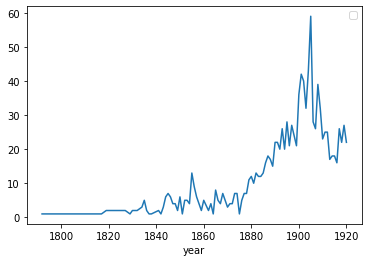

In [221]:
blah[['year','_fn']].groupby('year').count().plot()

In [9]:
df.set_index('_fn', inplace=True)

In [191]:
df.head()

,filepath,target_word,location,of,the,asylum,had,become,familiar,to,...,hayne,rankiin,macintosh,helpin,enybody,nex,exchanging,confidences,professionally,uninterrupted
0,AMFCF0002-C00000-B1047100.txt,citizen,1.0,3.0,3.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AMFCF0002-C00000-B1114600.txt,citizen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AMFCF0002-C00000-B1161700.txt,citizen,NaN,7.0,18.0,NaN,NaN,NaN,NaN,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AMFCF0002-C00000-B0566600.txt,citizen,NaN,1.0,1.0,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AMFCF0002-C00000-B0528000.txt,citizen,NaN,2.0,2.0,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Link up with metadata:

In [11]:
meta = '/Users/e/Desktop/gale_meta_current.csv'

In [12]:
meta = pd.read_csv(meta)

Let's just check out `citizen` to start.

In [13]:
len(df[df['citizen'].notna()])

7072

`citizen` shows up in 38.8% of texts. More than I was expecting. Let's add metadata.

In [14]:
citizens = pd.DataFrame(df['citizen'][df['citizen'].notna()]).reset_index()

In [15]:
citizens.head()

,_fn,citizen
0,AMFCF0002-C00000-B1047100.txt,2.0
1,AMFCF0002-C00000-B1114600.txt,1.0
2,AMFCF0002-C00000-B1161700.txt,11.0
3,AMFCF0002-C00000-B0566600.txt,1.0
4,AMFCF0002-C00000-B0528000.txt,1.0


In [16]:
meta.columns

Index(['filename', 'year', 'author', 'author_birth_date', 'author_death_date',
       'full_title', 'publication_place_city', 'total_pages', 'ocr_accuracy',
       'valid_words', 'decade'],
      dtype='object')

In [17]:
citizens_meta = pd.merge(citizens, meta, left_on='_fn', right_on='filename')

Where are they distributed? (And who mentions them?)

/usr/local/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:572: UserWarning: The handle <matplotlib.lines.Line2D object at 0x122f59850> has a label of '_fn' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)


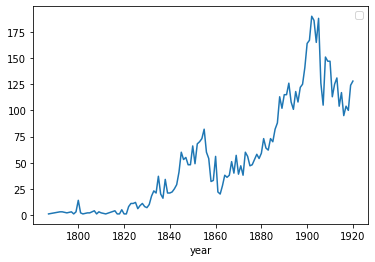

In [18]:
citizens_meta[['_fn','year']].groupby('year').count().plot()

So obviously the biggest effect here is going to be corpus size, which this roughly tracks. Need to scale these mentions by words per year.

In [19]:
meta.columns

Index(['filename', 'year', 'author', 'author_birth_date', 'author_death_date',
       'full_title', 'publication_place_city', 'total_pages', 'ocr_accuracy',
       'valid_words', 'decade'],
      dtype='object')

In [20]:
words_per_year = meta[['year','valid_words']].groupby('year').sum()

In [21]:
citizens_per_year = citizens_meta[['_fn','year']].groupby('year').count()

In [22]:
citizens_per_year.rename({'_fn':'valid_words'}, axis = 1)

,valid_words
year,
1787,1
1792,3
1793,3
1795,2
1797,3
...,...
1916,95
1917,104
1918,100


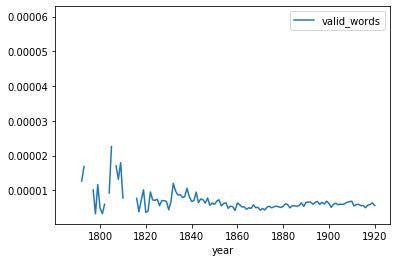

In [23]:
(citizens_per_year.rename({'_fn':'valid_words'}, axis = 1) / words_per_year).plot()

In [24]:
citizens_rate = (citizens_per_year.rename({'_fn':'valid_words'}, axis = 1) / words_per_year)

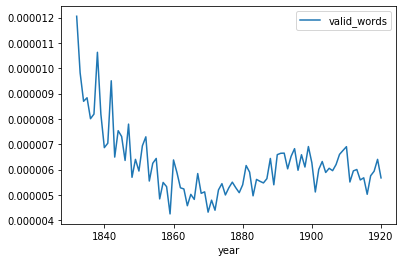

In [25]:
citizens_rate[citizens_rate.index >= 1832].plot()

Relatively consistent and low rate of mention. How many total mentions?

In [26]:
citizens.describe()

,citizen
count,7072.000000
mean,2.905826
std,6.567570
min,1.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,386.000000


...one book has "citizen" in it 386 times?

In [27]:
citizens.columns

Index(['_fn', 'citizen'], dtype='object')

In [28]:
citizens.sort_values(by = 'citizen',ascending = False)

,_fn,citizen
4063,AMFCF0003-C00000-B0165800.txt,386.0
6622,AMFCF0002-C00000-B0783000.txt,154.0
3445,AMFCF0002-C00000-B1074000.txt,118.0
5381,AMFCF0002-C00000-B0737900.txt,86.0
1083,AMFCF0002-C00000-B0804800.txt,86.0
...,...,...
4538,AMFCF0003-C00000-B0290300.txt,1.0
2023,AMFCF0002-C00000-B0373700.txt,1.0
4540,AMFCF0002-C00000-B0452700.txt,1.0
4542,AMFCF0002-C00000-B1469802.txt,1.0


In [29]:
list(citizens.sort_values(by = 'citizen',ascending = False)['_fn'][:10])

['AMFCF0003-C00000-B0165800.txt',
 'AMFCF0002-C00000-B0783000.txt',
 'AMFCF0002-C00000-B1074000.txt',
 'AMFCF0002-C00000-B0737900.txt',
 'AMFCF0002-C00000-B0804800.txt',
 'AMFCF0002-C00000-B1391200.txt',
 'AMFCF0003-C00000-B0165900.txt',
 'AMFCF0002-C00000-B1113100.txt',
 'AMFCF0002-C00000-B0046100.txt',
 'AMFCF0003-C00000-B0243900.txt']

In [30]:
meta[meta['filename'].isin(citizens.sort_values(by = 'citizen',ascending = False)['_fn'][:10])]

,filename,year,author,author_birth_date,author_death_date,full_title,publication_place_city,total_pages,ocr_accuracy,valid_words,decade
887,AMFCF0002-C00000-B1113100.txt,1904,"Churchill, Winston",1871,1947,The Crossing: By Winston Churchill; with Illus...,New York,616.0,0.920391,201781,1900
5879,AMFCF0002-C00000-B1391200.txt,1910,"Knight, Adele Ferguson",1867,NaN,Mademoiselle Celeste: A Romance of the French ...,Philadelphia,323.0,0.949728,87676,1910
7558,AMFCF0002-C00000-B1074000.txt,1900,"Sage, William",1864,NaN,Robert Tournay: A Romance of the French Revolu...,Boston; New York,391.0,0.915441,86923,1900
9209,AMFCF0003-C00000-B0165900.txt,1919,"Lathrop, William Addison",NaN,NaN,Love Time in Picardy: By William Addison Lathrop,New York,354.0,0.903565,60172,1910
10121,AMFCF0003-C00000-B0243900.txt,1911,"Seaman, Augusta Huiell",1879,1950,When a Cobbler Ruled the King: By Augusta Huie...,New York,374.0,0.934290,48243,1910
10492,AMFCF0002-C00000-B0737900.txt,1865,"Frothingham, Washington",1822,NaN,"Zoe: Or, the Martel Papers; a Manuscript of th...",New York,491.0,0.950459,107361,1860
13423,AMFCF0002-C00000-B0804800.txt,1897,"Windsor, William",1857,NaN,Loma: A Citizen of Venus..: William Windsor,St. Paul,465.0,0.973896,98083,1890
15662,AMFCF0002-C00000-B0783000.txt,1898,"Mitchell, S. Weir (Silas Weir)",1829,1914,"The Adventures of François: Foundling, Thief, ...",New York,337.0,0.925978,73193,1890
16124,AMFCF0002-C00000-B0046100.txt,1843,"Mathews, Cornelius",NaN,NaN,"The Various Writings of Cornelius Mathews, Emb...",New York,368.0,0.955117,323079,1840
16205,AMFCF0003-C00000-B0165800.txt,1917,"Larus, John Ruse",1858,NaN,The Masque of Death: A Story of the Terror: By...,New York,377.0,0.949569,106761,1910


One of these is by a Winston Churchill. (Not that one.)

Bestselling American novel of 1904:
https://en.wikipedia.org/wiki/The_Crossing_(Churchill_novel)

About westward expansion (of course) into Kentucky (why not?)

In [31]:
wc = 'AMFCF0002-C00000-B1113100.txt'

In [32]:
# import os
# with open(os.path.join('/Users/e/Desktop/gale_meta_validation/txt', wc)) as f:
#     print(f.read())

Total number of examples in the corpus:

In [33]:
citizens['citizen'].sum()

20550.0

Which texts contain the examples?

In [34]:
citizen_files = citizens['_fn']

In [35]:
import os
citizen_files = [os.path.join('/Users/e/Desktop/gale_meta_validation/txt', x) for x in citizen_files]

Let's get the KWICs of citizen from these files.

In [36]:
def get_locations(text, word):
    position = 0
    locs = []
    # normalize words
    text = text.lower()
    word = word.lower()
    while position != -1:
        position = text.find(word, position + 1)
        locs.append(position)
    
    return locs[:-1]

In [37]:
def kwic(locs, text, path, window = 200):
    import os
    import re
    l = []
    for loc in locs:
        mn = 0
        mx = len(text)
        start = loc - window
        stop = loc + window

        if start < mn:
            start = mn
            stop = window
        if stop > mx:
            start = mx - window
            stop = mx
        
        kwic = text[start:stop]
        # strip all whitespace from kwic for output
        kwic = re.sub('\s+', ' ', kwic)
        
        # output result
        d = {}
        d['char_position'] = loc
        d['kwic'] = kwic
        d['filename'] = os.path.split(path)[-1]
        l.append(d)
    
    return l

In [38]:
# if runtime is slow, multiprocess this
word = 'citizen'
output = []
for file in citizen_files:
    with open(file) as f:
        text = f.read()
        # create a dictionary containing the filename and character position of each instance
        locs = get_locations(text, word)
        d = kwic(locs, text, file)
        output.extend(d)

In [39]:
result = pd.DataFrame(output)

In [40]:
result

,char_position,kwic,filename
0,1434,n as if in the throes of an earthquake; huge c...,AMFCF0002-C00000-B1047100.txt
1,21780,"nducted his affairs with prudence, the stricte...",AMFCF0002-C00000-B1047100.txt
2,58740,"s golden! CHAPTER IX ""i’ll put a scorpion in h...",AMFCF0002-C00000-B1047100.txt
3,86619,"t on the east to Tremont on the west. ""Front S...",AMFCF0002-C00000-B1047100.txt
4,88853,"o had no means, and no relatives, were provide...",AMFCF0002-C00000-B1047100.txt
...,...,...,...
50775,119190,"ing wet pavements were in fact, death traps of...",AMFCF0003-C00000-B0297800.txt
50776,419684,onounced their heredity. Both men were dressed...,AMFCF0003-C00000-B0297800.txt
50777,173688,"d of wanted to get away. Strange to say, my di...",AMFCF0003-C00000-B0162100.txt
50778,313829,"The Monastery,” he directed, settling back in...",AMFCF0003-C00000-B0162100.txt


In [41]:
result.shape

(50780, 3)

Add metadata to result

In [42]:
citizens_meta = pd.merge(result, meta, on = 'filename')

In [43]:
citizens_meta.sort_values('year').to_csv('gale_citizen_kwic.csv')

Are there particular authors who are overrepresented?

Major authors include Twain, Cooper, Tourgee, Nathaniel Parker Willis, Irving, Bellamy, Harte, GW Cable, Garland, Lydia Maria Child... A lot of famous people.

Knight, Adele Ferguson and Barr, Amelia E. possibly the highest number of instances for a female author.

In [44]:
citizens_meta[['filename','author']].groupby('author').count().sort_values('filename', ascending = False).to_dict()

{'filename': {'Ingraham, J. H. (Joseph Holt)': 491,
  'Locke, David Ross': 450,
  'Larus, John Ruse': 443,
  'Twain, Mark': 267,
  'Sealsfield, Charles': 259,
  'Musick, John R. (John Roy)': 249,
  'Sage, William': 235,
  'Cooper, James Fenimore': 221,
  'Churchill, Winston': 214,
  'Mitchell, S. Weir (Silas Weir)': 198,
  'Tourgée, Albion W.': 197,
  'King, Charles': 190,
  'Mathews, Cornelius': 185,
  'Simms, William Gilmore': 184,
  'Arthur, T. S. (Timothy Shay)': 175,
  'Knight, Adele Ferguson': 172,
  'Ware, William': 171,
  'Windsor, William': 168,
  'Nye, Bill': 167,
  'Willis, Nathaniel Parker': 161,
  'Howard, H. R.': 153,
  'Browne, J. Ross (John Ross)': 149,
  'Harte, Bret': 142,
  'Schuette, H. George': 142,
  'Gilliam, E. W. (Edward Winslow)': 139,
  'Irving, Washington': 136,
  'Pinkerton, Allan': 134,
  'Bellamy, Edward': 126,
  'Day, Holman': 126,
  'Grant, Robert': 126,
  'Savage, Richard': 125,
  'Chambers, Robert W. (Robert William)': 124,
  'McCutcheon, George Barr'

# Citizen collocates

In [45]:
import nltk

In [46]:
stopwords = nltk.corpus.stopwords.words('english')

In [47]:
#!/usr/bin/env python
# coding: utf-8

# In[2]:


import os
import string
import re
import pandas as pd
from collections import Counter




# In[3]:


def absolute_paths(directory, txt_only = True):
    files = os.listdir(directory)
    absolute_paths = []
    
    for file in files:
        path = os.path.join(directory, file)
        absolute_paths.append(path)
    
    if txt_only is True:
        txts = []
        for x in absolute_paths:
            if str('.txt') in str(x):
                txts.append(x)
        return txts
    
    else:        
        return absolute_paths


# In[4]:


def tokenize(text, keep_punct = False):
    if keep_punct is True:
        for punct in string.punctuation:
            text = text.replace(punct, ' ' + punct + ' ')
    else:
        for punct in string.punctuation:
            text = text.replace(punct, ' ')
    
    # this replaces *any* amount of whitespace with a single space using regular expressions
    text = re.sub('\s+', ' ', text.lower())
    
    result = []
    
    for x in text.split(' '):
        if x.isalpha():
            result.append(x)
        else:
            word = []
            for y in x: # for every character
                if y.isalpha() or y == '\'':
                    word.append(y)
            if len(word) > 0:
                result.append(''.join(word))
                
    return result


def make_dtm(files, scaled = False, keep_top = None):
    '''Makes a document-term matrix from a directory of .txt files.
    `scaled` option scaled frequencies when set to True.
    `drop_below` sets the rate of occurrence at which words will be dropped. Default is None. i.e. retain all words.'''
#     files = absolute_paths(directory)
    
    result = [] # empty list where I will append the dictionaries of word counts
    
    for file in files: # looping over the results
        text = open(file).read() # read in text file
        tokens = tokenize(text) # make tokens list
        d = dict(Counter(tokens)) # use count_words to create a dictionary
        # os.path.split() returns the base path and the filename as a pair:
        d['filepath'] = os.path.split(file)[-1] # include the _ before filename in case the text contains "filename"
        result.append(d) # append the unscaled result
    
    
    
    df = pd.DataFrame(result).set_index('filepath').sort_index()
    
    if keep_top:
        # this ensures we use raw counts for frequencies
        top_words = sorted(list(df.sum().sort_values(ascending = False)[:keep_top].index))
                           
    if scaled is True:
        rowsums = df.sum(axis = 'columns')
        df = df.divide(rowsums, axis = 'rows')
    
    if keep_top:
        df = df[top_words]
    
    return df

In [48]:
def get_collocates(filepath, target_word, horizon = 10):
    text = open(filepath).read() # get text
    tokens = tokenize(text) # get tokens
    
    indexes = []

    for i, token in enumerate(tokens):
        if token == target_word:
            indexes.append(i) # get indexes
    
    collocates = []

    for index in indexes:
        colls = tokens[index-horizon:index+horizon+1]
        # remove one instance of tt so it doesn't double-count itself
        if colls:
            del colls[colls.index(target_word)]
            collocates.extend(colls) # we use extend rather than append because we are adding additional elements *from* a list
        
    d = {}
    # we want to make sure we get data about where our values are coming from. this tells us the file:
    d['filepath'] = os.path.split(filepath)[-1] 
    d['target_word'] = target_word # this tells us our target
    
    for coll in collocates:
        if coll not in d:
            d[coll] = 1 # count up collocates
        else:
            d[coll] += 1
    
    return d

In [49]:
# this function depends upon a few of our old friends absolute_paths and tokenizer
# txt_dir points to a directory where your text files are located, and stored in .txt format

def corp_collocates(word, filepaths, horizon = 10, percentile = 0.9, drop_stopwords = True):
#     # 1. generate a list of files
#     filepaths = absolute_paths(txt_dir)
    
    # 2. make a list of dictionaries containing our data
    output = []
    
#     # 2.5. make this multiprocessing
#     from multiprocessing import Pool
    
#     # nested function for local scope
#     def coll_run(x):
#         return get_collocates(x, word, horizon)
    
#     with Pool() as p:
#         collocates = p.map(coll_run, filepaths)
#     for filepath in filepaths:
#         collocates = get_collocates(filepath, word, horizon)
#         output.append(collocates)


    
    import multiprocessing
    from functools import partial
    from contextlib import contextmanager

    @contextmanager
    def poolcontext(*args, **kwargs):
        pool = multiprocessing.Pool(*args, **kwargs)
        yield pool
        pool.terminate()

    with poolcontext() as pool:
        output = pool.map(partial(get_collocates, target_word=word), filepaths)
        
    return output
    
#     # 3. make a dataframe of our results
#     dtm = pd.DataFrame(output)
#     dtm = dtm.set_index(['filepath', 'target_word']).sort_index()
    
#     # 4. optionally drop stopwords
#     keep = []
#     if drop_stopwords is True:
#         for x in dtm.columns:
#             if x not in stopwords:    
#                 keep.append(x)
    
#         dtm = dtm[keep]        
        
#     # 5. sum dtm and cut to percentile
#     sums = dtm.sum()
#     pct_index = round(len(sums) * percentile)
#     top_words = sums.sort_values()[pct_index:].index # index returns the list of words
    
#     # 6. scale results
#     dtm = dtm[top_words]
#     raw_values = make_dtm(filepaths)[top_words]
#     scaled_results = dtm.sum() / raw_values.sum()
    
#     return scaled_results.sort_values(ascending = False)

In [50]:
import os
base = '/Users/e/Desktop/gale_meta_validation/txt'
filepaths = [os.path.join(base, x) for x in citizens['_fn']]

In [51]:
import time
start = time.time()
output = corp_collocates('citizen', filepaths)
print(time.time()-start)

117.55609917640686


In [61]:
start = time.time()
df = pd.DataFrame(output)
print(time.time()-start)

29.44904899597168


In [62]:
df

,filepath,target_word,location,of,the,asylum,had,become,familiar,to,...,hayne,rankiin,macintosh,helpin,enybody,nex,exchanging,confidences,professionally,uninterrupted
0,AMFCF0002-C00000-B1047100.txt,citizen,1.0,3.0,3.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AMFCF0002-C00000-B1114600.txt,citizen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AMFCF0002-C00000-B1161700.txt,citizen,NaN,7.0,18.0,NaN,NaN,NaN,NaN,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AMFCF0002-C00000-B0566600.txt,citizen,NaN,1.0,1.0,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AMFCF0002-C00000-B0528000.txt,citizen,NaN,2.0,2.0,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7067,AMFCF0002-C00000-B0032600.txt,citizen,NaN,7.0,10.0,NaN,1.0,NaN,NaN,2.0,...,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7068,AMFCF0002-C00000-B0161100.txt,citizen,NaN,1.0,NaN,NaN,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7069,AMFCF0003-C00000-B0044700.txt,citizen,NaN,2.0,7.0,NaN,4.0,NaN,NaN,5.0,...,NaN,NaN,NaN,1.0,1.0,1.0,1.0,2.0,1.0,NaN
7070,AMFCF0003-C00000-B0297800.txt,citizen,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
keep = []
for x in df.columns:
    if x not in stopwords:
        keep.append(x)

In [68]:
dtm = df[keep]

In [69]:
sums = dtm.sum()

Let's compare the 500 words most closely associated with each in the newspaper and in the lit corpus.

In [157]:
gale_sums = sums[2:502].sort_values(ascending = False)

In [100]:
proquest_sums = pd.read_csv('/Users/e/code/c19_2020/citizen_collocates_raw.csv')

In [105]:
overlap = set(proquest_sums[:100]['citizen_collocate']) & set(gale_sums.index)

In [158]:
gale_sums[overlap].sort_values(ascending = False)

good       1706
every      1587
man        1582
one        1398
would      1157
become      577
right       564
great       476
time        457
public      359
shall       335
way         318
city        306
part        180
work        166
service      87
c            57
lie          52
dtype: object

In [186]:
tests = ['black','white','negro','indian','native','woman',
         'women','chinese', 'china', 'foreign', 'vote', 'elect', 'franchise',
        'race','races']

In [187]:
for x in tests:
    if x in (gale_sums[gale_sums > 1].index):
        print(x, gale_sums[x])

native 150.0
woman 117.0


In [190]:
for x in tests:
    if x not in (proquest_sums[proquest_sums > 1].index):
        print(x)
        
print('done')

done


In [188]:
for x in tests:
    if x in (proquest_sums[proquest_sums > 1].index):
        print(proquest_sums[proquest_sums.index == x])

                      n
citizen_collocate      
black              3777
                      n
citizen_collocate      
white              7615
                      n
citizen_collocate      
negro              8674
                      n
citizen_collocate      
indian             1350
                      n
citizen_collocate      
native             6959
                      n
citizen_collocate      
woman              4085
                      n
citizen_collocate      
women              2275
                      n
citizen_collocate      
chinese            2601
                      n
citizen_collocate      
china              1361
                      n
citizen_collocate      
foreign            6877
                       n
citizen_collocate       
vote               13346
                    n
citizen_collocate    
elect              69
                     n
citizen_collocate     
franchise          166
                      n
citizen_collocate      
race               361

In [125]:
proquest_sums = proquest_sums.set_index('citizen_collocate')

In [133]:
proquest_sums.describe()

,n
count,16274.000000
mean,341.489185
std,2569.428847
min,3.000000
25%,3.000000
50%,10.000000
75%,48.000000
max,138114.000000


In [143]:
proquest_sums.columns

Index(['n'], dtype='object')

In [152]:
proquest_sums[(proquest_sums <= 8674) & (proquest_sums > 1300)].dropna().sort_values(by = 'n', ascending = False).to_dict()

{'n': {'negro': 8674.0,
  'social': 8558.0,
  'liberty': 8517.0,
  'cannot': 8491.0,
  'army': 8490.0,
  'town': 8463.0,
  'ing': 8365.0,
  'say': 8162.0,
  'b': 8088.0,
  'fact': 7820.0,
  'ever': 7747.0,
  'name': 7732.0,
  'might': 7709.0,
  'republic': 7708.0,
  'give': 7676.0,
  'tbe': 7651.0,
  'today': 7631.0,
  'white': 7615.0,
  'ot': 7599.0,
  'german': 7574.0,
  'land': 7467.0,
  'since': 7454.0,
  'party': 7406.0,
  'present': 7391.0,
  'america': 7382.0,
  'laws': 7376.0,
  'society': 7332.0,
  'best': 7282.0,
  'TRUE': 7209.0,
  'high': 7175.0,
  'respected': 7161.0,
  'v': 7156.0,
  'death': 7128.0,
  'duties': 7056.0,
  'father': 6979.0,
  'native': 6959.0,
  'order': 6934.0,
  'given': 6878.0,
  'foreign': 6877.0,
  'full': 6801.0,
  'go': 6799.0,
  'act': 6786.0,
  'patriotic': 6774.0,
  'education': 6773.0,
  'question': 6733.0,
  'says': 6731.0,
  'three': 6728.0,
  'de': 6706.0,
  'called': 6699.0,
  'tion': 6684.0,
  'office': 6658.0,
  'constitution': 6620.0,
  '

In [131]:
proquest_sums[proquest_sums.index.isin(['black','white','negro','indian','native','woman','women'])]

,n
citizen_collocate,
negro,8674
white,7615
native,6959
woman,4085
black,3777
women,2275
indian,1350


In [ ]:
# scale the results based on the *existing* dtm; don't dynamically create a new one each time the function runs
# TODO: use skiprows option with integer list representing the row numbers that do *not* contain the target term
gale_dtm = pd.read_csv('/Users/e/Desktop/gale_dtm.csv', )